<center><a href="https://ibb.co/cJD6pSW"><img src="https://i.ibb.co/y0W6Mcz/cover-depan.jpg" alt="cover-depan" border="0"></a>

# Klasifikasi Prediksi Pinjaman Mobil
Mentor: Mega Bagus Herlambang, PhD

<hr>

In [1]:
# Mengimpor library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, RandomizedSearchCV

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

In [7]:
# Load dataset
dataku = pd.read_excel('Car Loan - Data Set.xlsx')

In [8]:
# Copy dataku ke df
df = dataku.copy()

# Melihat dimensi df
print(df.shape)

# Melihat tampilan df
df.head()

(21662, 34)


,ID,Requested_Amount,Emi_Amount,Age,Applicant_Postal_Code,Duration_Of_Current_Emp,Product_Name1,Product_Line,Loan_Term,Variant_Code,...,No_Of_Years_In_City,No_Of_Years_At_Business,Segment_Desc,Cost_Of_Vehicle,Average_Bank_Balance,cibil_score,Disbursed,IRR,MAX_OD_F_12M,TOTAL_NTECH_BNC_F12M
0,1,200000,5750.0,40.50,400091.0,5.0,CHEVROLET SPARK,CHEVROLET SPARK LT 1.0 BS-IV OBDII,48.0,LT 1.0 BS-IV OBDII,...,35.0,NaN,Compact,237342.0,NaN,594.0,No,24.70,NaN,NaN
1,2,1900000,NaN,41.25,641002.0,NaN,FORTUNER 4 WD,TOYOTA - FORTUNER 4 WD,48.0,FORTUNER 4 WD,...,1.0,NaN,SUV,2400000.0,NaN,754.0,Yes,24.70,0.0,0.0
2,3,1600000,NaN,39.50,641002.0,NaN,NaN,TOYOTA - FORTUNER 3.0 L,48.0,FORTUNER 3.0 L,...,1.0,NaN,SUV,2200000.0,NaN,779.0,Yes,16.50,0.0,0.0
3,4,300000,9050.0,35.00,390019.0,16.0,NISSAN MICRA,NISSAN MICRA,48.0,NISSAN MICRA XL,...,7.0,NaN,Compact,365750.0,NaN,818.0,Yes,18.10,0.0,0.0
4,5,250000,8750.0,34.00,390023.0,NaN,XYLO E8,XYLO E8,36.0,XYLO E8,...,2.0,NaN,MUV,548750.0,NaN,853.0,Yes,17.69,0.0,1.0


In [9]:
# Melihat summary df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21662 entries, 0 to 21661
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ID                         21662 non-null  int64         
 1   Requested_Amount           21662 non-null  int64         
 2   Emi_Amount                 21060 non-null  float64       
 3   Age                        21662 non-null  float64       
 4   Applicant_Postal_Code      21659 non-null  float64       
 5   Duration_Of_Current_Emp    5014 non-null   float64       
 6   Product_Name1              21419 non-null  object        
 7   Product_Line               21659 non-null  object        
 8   Loan_Term                  21660 non-null  float64       
 9   Variant_Code               21659 non-null  object        
 10  Manufacturer_Desc          21659 non-null  object        
 11  Gender_Desc                21655 non-null  object        
 12  Mari

In [10]:
# Mengecek data yang terduplikasi
df.duplicated().sum()

0

Tidak terdapat data duplikat.

In [11]:
# Melihat dimensi data
df.shape

(21662, 34)

In [12]:
# Mengecek nilai kosong
df.isna().mean()*100

ID                             0.000000
Requested_Amount               0.000000
Emi_Amount                     2.779060
Age                            0.000000
Applicant_Postal_Code          0.013849
Duration_Of_Current_Emp       76.853476
Product_Name1                  1.121780
Product_Line                   0.013849
Loan_Term                      0.009233
Variant_Code                   0.013849
Manufacturer_Desc              0.013849
Gender_Desc                    0.032315
Marital_Status_Desc           10.820792
Applicant_State_Desc           0.023082
Applicant_City_Desc            0.041547
Resid_Owned_By_Desc            1.657280
Employment_Type_Desc           0.004616
Total_Work_Experience         77.130459
application_creation_date      0.000000
Ex_Showroom_Price             12.828917
Segment                        1.874250
Current Valuation             12.865848
Years_In_Current_Business     34.415105
No_Of_Years_At_Residence      12.570400
No_Of_Years_In_City            1.634198


In [13]:
# Membuang kolom yang memiliki missing values di atas 30%
for i in df.columns:
    if df.isna().mean()[str(i)] > 0.3:
        print(i)
        df.drop(str(i), axis=1, inplace=True)

Duration_Of_Current_Emp
Total_Work_Experience
Years_In_Current_Business
No_Of_Years_At_Business
Average_Bank_Balance
MAX_OD_F_12M
TOTAL_NTECH_BNC_F12M


In [14]:
# Mengecek kembali misisng values
df.isna().mean()*100

ID                            0.000000
Requested_Amount              0.000000
Emi_Amount                    2.779060
Age                           0.000000
Applicant_Postal_Code         0.013849
Product_Name1                 1.121780
Product_Line                  0.013849
Loan_Term                     0.009233
Variant_Code                  0.013849
Manufacturer_Desc             0.013849
Gender_Desc                   0.032315
Marital_Status_Desc          10.820792
Applicant_State_Desc          0.023082
Applicant_City_Desc           0.041547
Resid_Owned_By_Desc           1.657280
Employment_Type_Desc          0.004616
application_creation_date     0.000000
Ex_Showroom_Price            12.828917
Segment                       1.874250
Current Valuation            12.865848
No_Of_Years_At_Residence     12.570400
No_Of_Years_In_City           1.634198
Segment_Desc                  1.874250
Cost_Of_Vehicle               0.009233
cibil_score                   0.036931
Disbursed                

In [15]:
# Membuang kolom ID dan application_creation_date
df.drop(columns = ['ID', 'Applicant_Postal_Code' , 'application_creation_date'], axis=1, inplace=True)

In [16]:
# Melihat df
df.head()

,Requested_Amount,Emi_Amount,Age,Product_Name1,Product_Line,Loan_Term,Variant_Code,Manufacturer_Desc,Gender_Desc,Marital_Status_Desc,...,Ex_Showroom_Price,Segment,Current Valuation,No_Of_Years_At_Residence,No_Of_Years_In_City,Segment_Desc,Cost_Of_Vehicle,cibil_score,Disbursed,IRR
0,200000,5750.0,40.50,CHEVROLET SPARK,CHEVROLET SPARK LT 1.0 BS-IV OBDII,48.0,LT 1.0 BS-IV OBDII,CHEVROLET INDIA LTD,Male,NaN,...,NaN,A2,NaN,NaN,35.0,Compact,237342.0,594.0,No,24.70
1,1900000,NaN,41.25,FORTUNER 4 WD,TOYOTA - FORTUNER 4 WD,48.0,FORTUNER 4 WD,TOYOTA,Male,Married,...,NaN,SUV,NaN,NaN,1.0,SUV,2400000.0,754.0,Yes,24.70
2,1600000,NaN,39.50,NaN,TOYOTA - FORTUNER 3.0 L,48.0,FORTUNER 3.0 L,TOYOTA,Male,Married,...,NaN,SUV,NaN,NaN,1.0,SUV,2200000.0,779.0,Yes,16.50
3,300000,9050.0,35.00,NISSAN MICRA,NISSAN MICRA,48.0,NISSAN MICRA XL,NISSAN,Male,Married,...,365750.0,A2,365750.0,7.0,7.0,Compact,365750.0,818.0,Yes,18.10
4,250000,8750.0,34.00,XYLO E8,XYLO E8,36.0,XYLO E8,MAHINDRA,Male,Married,...,548750.0,MUV,548750.0,2.0,2.0,MUV,548750.0,853.0,Yes,17.69


In [17]:
# Mengecek jumlah kategori di setiap kolom bertipe kategori
for i in df.columns:
    if df[str(i)].dtype == 'O':
        
        # Mengecek seberapa banyak kategorinya dan mencetak nama kolomnya
        print(i)
        print(len(df[str(i)].drop_duplicates()))
        
        # Membuang kolom yang kategorinya terlalu banyak
        if len(df[str(i)].drop_duplicates()) > 10:
            print('Buang kolom = ',str(i))
            df.drop(str(i), axis=1, inplace=True)
        
        print('')

Product_Name1
348
Buang kolom =  Product_Name1

Product_Line
1443
Buang kolom =  Product_Line

Variant_Code
1260
Buang kolom =  Variant_Code

Manufacturer_Desc
33
Buang kolom =  Manufacturer_Desc

Gender_Desc
3

Marital_Status_Desc
5

Applicant_State_Desc
29
Buang kolom =  Applicant_State_Desc

Applicant_City_Desc
372
Buang kolom =  Applicant_City_Desc

Resid_Owned_By_Desc
9

Employment_Type_Desc
7

Segment
10

Segment_Desc
10

Disbursed
2



In [18]:
# Ringkasan data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21662 entries, 0 to 21661
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Requested_Amount          21662 non-null  int64  
 1   Emi_Amount                21060 non-null  float64
 2   Age                       21662 non-null  float64
 3   Loan_Term                 21660 non-null  float64
 4   Gender_Desc               21655 non-null  object 
 5   Marital_Status_Desc       19318 non-null  object 
 6   Resid_Owned_By_Desc       21303 non-null  object 
 7   Employment_Type_Desc      21661 non-null  object 
 8   Ex_Showroom_Price         18883 non-null  float64
 9   Segment                   21256 non-null  object 
 10  Current Valuation         18875 non-null  float64
 11  No_Of_Years_At_Residence  18939 non-null  float64
 12  No_Of_Years_In_City       21308 non-null  float64
 13  Segment_Desc              21256 non-null  object 
 14  Cost_O

In [19]:
# Melihat ringkasan data
df.describe()

,Requested_Amount,Emi_Amount,Age,Loan_Term,Ex_Showroom_Price,Current Valuation,No_Of_Years_At_Residence,No_Of_Years_In_City,Cost_Of_Vehicle,cibil_score,IRR
count,2.166200e+04,2.106000e+04,21662.000000,21660.000000,1.888300e+04,1.887500e+04,18939.000000,2.130800e+04,2.166000e+04,21654.000000,21662.000000
mean,7.324396e+07,1.788169e+04,39.093055,43.980148,6.868931e+05,2.301728e+07,13.930653,4.360622e+05,7.713597e+05,606.217835,18.225091
std,4.968147e+09,2.401851e+04,10.154899,12.882381,1.018567e+06,2.583385e+09,11.567835,6.365106e+07,3.609668e+06,303.174540,3.705670
min,7.200000e+01,0.000000e+00,18.100000,3.000000,0.000000e+00,1.000000e+00,0.000000,0.000000e+00,4.800000e+04,-1.000000,10.690000
25%,2.750000e+05,8.663750e+03,31.200000,36.000000,3.354405e+05,3.348540e+05,5.000000,5.000000e+00,3.500000e+05,597.000000,15.710000
50%,4.050000e+05,1.269600e+04,37.580000,36.000000,4.885440e+05,4.879000e+05,10.000000,1.000000e+01,5.067300e+05,757.000000,17.510000
75%,6.500000e+05,1.980000e+04,45.670000,60.000000,7.449485e+05,7.443720e+05,20.000000,2.000000e+01,8.000000e+05,796.000000,20.600000
max,4.630100e+11,1.379000e+06,83.800000,960.000000,8.188200e+07,3.470100e+11,69.000000,9.291311e+09,5.044863e+08,897.000000,26.500000


In [20]:
# Melihat ringkasan data
df.describe(include='O')

,Gender_Desc,Marital_Status_Desc,Resid_Owned_By_Desc,Employment_Type_Desc,Segment,Segment_Desc,Disbursed
count,21655,19318,21303,21661,21256,21256,21662
unique,2,4,8,6,9,9,2
top,Male,Married,SELF,SELF EMPLOYED NON-PROFESSIONAL,A2,Compact,No
freq,19168,18185,14151,15786,7913,7913,13356


In [21]:
# Melihat kategori pada target
df['Disbursed'].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
# Melihat proporsi data
print(df['Disbursed'].value_counts()/len(df['Disbursed']))

No     0.616564
Yes    0.383436
Name: Disbursed, dtype: float64


Jumlah proporsi bernilai 0 (No) : 0.62
Jumlah proporsi bernilai 1 (Yes) : 0.38


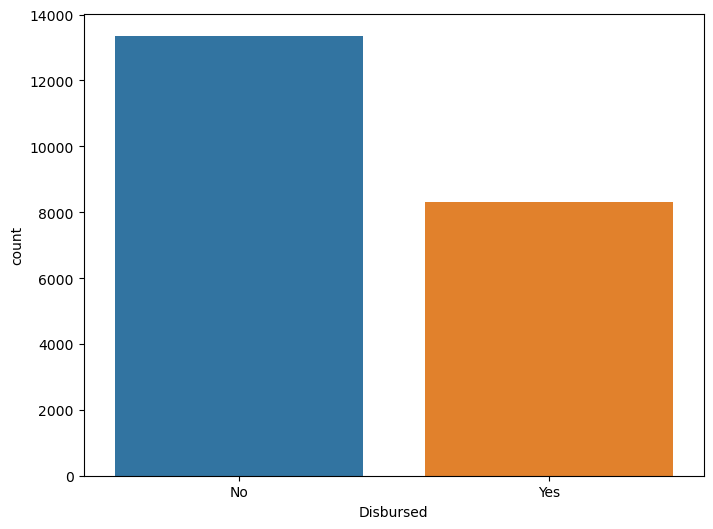

In [23]:
# Melihat proporsi kategori di label apakah balanced atau tidak
plt.figure(figsize=(8,6))
sns.countplot(x = df['Disbursed']);

# Mencetak proporsinya
print('Jumlah proporsi bernilai 0 (No) : %.2f' % (df['Disbursed'].value_counts()[0] / len(df)))
print('Jumlah proporsi bernilai 1 (Yes) : %.2f' % (df['Disbursed'].value_counts()[1] / len(df)))

Datanya tampak tidak balanced, maka harus diseimbangkan terlebih dahulu.

In [24]:
# Merubah kolom 'Loan Status' menjadi angka 0 dan 1
df['Disbursed'] = df['Disbursed'].map({'No': 0, 'Yes': 1}).astype('category')

In [25]:
# Mengecek apakah sudah berubah
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21662 entries, 0 to 21661
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Requested_Amount          21662 non-null  int64   
 1   Emi_Amount                21060 non-null  float64 
 2   Age                       21662 non-null  float64 
 3   Loan_Term                 21660 non-null  float64 
 4   Gender_Desc               21655 non-null  object  
 5   Marital_Status_Desc       19318 non-null  object  
 6   Resid_Owned_By_Desc       21303 non-null  object  
 7   Employment_Type_Desc      21661 non-null  object  
 8   Ex_Showroom_Price         18883 non-null  float64 
 9   Segment                   21256 non-null  object  
 10  Current Valuation         18875 non-null  float64 
 11  No_Of_Years_At_Residence  18939 non-null  float64 
 12  No_Of_Years_In_City       21308 non-null  float64 
 13  Segment_Desc              21256 non-null  obje

In [26]:
# Melihat kolom kategori bertipe 'object'
kategori = [var for var in df.columns if df[var].dtype == 'O']

# Melihat tipe data kategori
print(kategori)

['Gender_Desc', 'Marital_Status_Desc', 'Resid_Owned_By_Desc', 'Employment_Type_Desc', 'Segment', 'Segment_Desc']


In [27]:
# Mengganti semua tipe data 'object' ke 'category'
for i in kategori:
    df[i] = df[i].astype('category')

In [28]:
# Melihat kolom df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21662 entries, 0 to 21661
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Requested_Amount          21662 non-null  int64   
 1   Emi_Amount                21060 non-null  float64 
 2   Age                       21662 non-null  float64 
 3   Loan_Term                 21660 non-null  float64 
 4   Gender_Desc               21655 non-null  category
 5   Marital_Status_Desc       19318 non-null  category
 6   Resid_Owned_By_Desc       21303 non-null  category
 7   Employment_Type_Desc      21661 non-null  category
 8   Ex_Showroom_Price         18883 non-null  float64 
 9   Segment                   21256 non-null  category
 10  Current Valuation         18875 non-null  float64 
 11  No_Of_Years_At_Residence  18939 non-null  float64 
 12  No_Of_Years_In_City       21308 non-null  float64 
 13  Segment_Desc              21256 non-null  cate

In [29]:
# Melihat df
df.head()

,Requested_Amount,Emi_Amount,Age,Loan_Term,Gender_Desc,Marital_Status_Desc,Resid_Owned_By_Desc,Employment_Type_Desc,Ex_Showroom_Price,Segment,Current Valuation,No_Of_Years_At_Residence,No_Of_Years_In_City,Segment_Desc,Cost_Of_Vehicle,cibil_score,Disbursed,IRR
0,200000,5750.0,40.50,48.0,Male,NaN,SELF,SALARIED,NaN,A2,NaN,NaN,35.0,Compact,237342.0,594.0,0,24.70
1,1900000,NaN,41.25,48.0,Male,Married,SELF,RETIRED,NaN,SUV,NaN,NaN,1.0,SUV,2400000.0,754.0,1,24.70
2,1600000,NaN,39.50,48.0,Male,Married,SELF,RETIRED,NaN,SUV,NaN,NaN,1.0,SUV,2200000.0,779.0,1,16.50
3,300000,9050.0,35.00,48.0,Male,Married,SELF,SALARIED,365750.0,A2,365750.0,7.0,7.0,Compact,365750.0,818.0,1,18.10
4,250000,8750.0,34.00,36.0,Male,Married,SELF,SELF EMPLOYED NON-PROFESSIONAL,548750.0,MUV,548750.0,2.0,2.0,MUV,548750.0,853.0,1,17.69


In [30]:
# Ringkasan variabel numerik
df.describe()

,Requested_Amount,Emi_Amount,Age,Loan_Term,Ex_Showroom_Price,Current Valuation,No_Of_Years_At_Residence,No_Of_Years_In_City,Cost_Of_Vehicle,cibil_score,IRR
count,2.166200e+04,2.106000e+04,21662.000000,21660.000000,1.888300e+04,1.887500e+04,18939.000000,2.130800e+04,2.166000e+04,21654.000000,21662.000000
mean,7.324396e+07,1.788169e+04,39.093055,43.980148,6.868931e+05,2.301728e+07,13.930653,4.360622e+05,7.713597e+05,606.217835,18.225091
std,4.968147e+09,2.401851e+04,10.154899,12.882381,1.018567e+06,2.583385e+09,11.567835,6.365106e+07,3.609668e+06,303.174540,3.705670
min,7.200000e+01,0.000000e+00,18.100000,3.000000,0.000000e+00,1.000000e+00,0.000000,0.000000e+00,4.800000e+04,-1.000000,10.690000
25%,2.750000e+05,8.663750e+03,31.200000,36.000000,3.354405e+05,3.348540e+05,5.000000,5.000000e+00,3.500000e+05,597.000000,15.710000
50%,4.050000e+05,1.269600e+04,37.580000,36.000000,4.885440e+05,4.879000e+05,10.000000,1.000000e+01,5.067300e+05,757.000000,17.510000
75%,6.500000e+05,1.980000e+04,45.670000,60.000000,7.449485e+05,7.443720e+05,20.000000,2.000000e+01,8.000000e+05,796.000000,20.600000
max,4.630100e+11,1.379000e+06,83.800000,960.000000,8.188200e+07,3.470100e+11,69.000000,9.291311e+09,5.044863e+08,897.000000,26.500000


In [31]:
# Ringkasan variabel kategori
df.describe(include='category')

,Gender_Desc,Marital_Status_Desc,Resid_Owned_By_Desc,Employment_Type_Desc,Segment,Segment_Desc,Disbursed
count,21655,19318,21303,21661,21256,21256,21662
unique,2,4,8,6,9,9,2
top,Male,Married,SELF,SELF EMPLOYED NON-PROFESSIONAL,A2,Compact,0
freq,19168,18185,14151,15786,7913,7913,13356


In [32]:
# Membagi kolom menjadi kolom numerik dan kategori
var_kategori = [var for var in df.columns if df[var].dtype == 'category' and var!='Disbursed']
var_numerik = [var for var in df.columns if df[var].dtype!='category' and var!='Disbursed']

# Melihat variabel yang sudah dipisah
print(var_kategori)
print(var_numerik)

['Gender_Desc', 'Marital_Status_Desc', 'Resid_Owned_By_Desc', 'Employment_Type_Desc', 'Segment', 'Segment_Desc']
['Requested_Amount', 'Emi_Amount', 'Age', 'Loan_Term', 'Ex_Showroom_Price', 'Current Valuation', 'No_Of_Years_At_Residence', 'No_Of_Years_In_City', 'Cost_Of_Vehicle', 'cibil_score', 'IRR']


In [ ]:
# Melihat pairplot
sns.pairplot(df)

In [ ]:
# Melihat skor korelasi
sns.heatmap(df.corr(), annot=True, fmt=".2f")

<br>

### Menentukan variabel independen (X) dan variabel dependen (y)

In [34]:
df.shape

(21662, 18)

In [35]:
# Mendefinisikan variabel dependen (y) dan variabel independen (X)
X = df.iloc[:, df.columns != 'Disbursed']
y = df['Disbursed']

In [36]:
# Melihat X
X.head()

,Requested_Amount,Emi_Amount,Age,Loan_Term,Gender_Desc,Marital_Status_Desc,Resid_Owned_By_Desc,Employment_Type_Desc,Ex_Showroom_Price,Segment,Current Valuation,No_Of_Years_At_Residence,No_Of_Years_In_City,Segment_Desc,Cost_Of_Vehicle,cibil_score,IRR
0,200000,5750.0,40.50,48.0,Male,NaN,SELF,SALARIED,NaN,A2,NaN,NaN,35.0,Compact,237342.0,594.0,24.70
1,1900000,NaN,41.25,48.0,Male,Married,SELF,RETIRED,NaN,SUV,NaN,NaN,1.0,SUV,2400000.0,754.0,24.70
2,1600000,NaN,39.50,48.0,Male,Married,SELF,RETIRED,NaN,SUV,NaN,NaN,1.0,SUV,2200000.0,779.0,16.50
3,300000,9050.0,35.00,48.0,Male,Married,SELF,SALARIED,365750.0,A2,365750.0,7.0,7.0,Compact,365750.0,818.0,18.10
4,250000,8750.0,34.00,36.0,Male,Married,SELF,SELF EMPLOYED NON-PROFESSIONAL,548750.0,MUV,548750.0,2.0,2.0,MUV,548750.0,853.0,17.69


In [37]:
# Melihat y
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Disbursed, dtype: category
Categories (2, int64): [0, 1]

<br>

### Balancing dataset

In [38]:
# Balancind dataset dengan Undersampling
ros = RandomUnderSampler(
    sampling_strategy= 'auto', # sampling minority class
    random_state= 0, # for reproducibility
    replacement=True 
)  
X_res, y_res = ros.fit_resample(X, y)

In [39]:
# Melihat proporsi yang baru
print(y_res.value_counts()/len(y_res))

0    0.5
1    0.5
Name: Disbursed, dtype: float64


In [40]:
# Melihat dimensi data
print(X_res.shape)
print(y_res.shape)

(16612, 17)
(16612,)


<br>

### Splitting dataset

In [41]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(
    X_res,
    y_res,
    test_size = 0.2,
    random_state = 0)

# Melihat dimensi training set dan test set
print((X_train.shape), (X_test.shape))

(13289, 17) (3323, 17)


In [42]:
# Reset index X_train dan X_test
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [43]:
# Reset index y_train dan y_test
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [53]:
# Membuat Pipeline untuk preprocessing
preprocessor_numerik = Pipeline([
    ('imputasi', SimpleImputer(strategy='median')),
    ('scaling', MinMaxScaler())
])

preprocessor_kategori = Pipeline([
    ('imputasi', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('encoding', OneHotEncoder(drop='first', handle_unknown='ignore'))         
])

# Menggabungkan kedua pipeline di atas
preprocessor = ColumnTransformer([
    ('preprocessing numerik', preprocessor_numerik, var_numerik),
    ('preprocessing kategori', preprocessor_kategori, var_kategori)
])

Sebelum kita bandingkan beberapa model, kita coba buat 1 pipeline dengan salah satu model klasifikasi.

Kita coba menggunakan regresi logistik.

In [54]:
# Model regresi logistik
logreg = LogisticRegression(max_iter=1000)

# Pipeline model regresi logistik
pipe_logreg = Pipeline([
    ('preprocessing', preprocessor),
    ('logreg', logreg)
])

In [55]:
# Fitting ke training set
pipe_logreg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('preprocessing numerik',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['Requested_Amount',
                                                   'Emi_Amount', 'Age',
                                                   'Loan_Term',
                                                   'Ex_Showroom_Price',
                                                   'Current Valuation',
                                                   'No_Of_Years_At_Residence',
                                                   'No_Of_Years_In_City',
                                                   'Cost_Of_Vehicle',
                                                   'cibil_score', 'IRR']),
                                                 ('preprocessing kategori',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['Gender_Desc',
                                                   'Marital_Status_Desc',
                                                   'Resid_Owned_By_Desc',
                                                   'Employment_Type_Desc',
                                                   'Segment',
                                                   'Segment_Desc'])])),
                ('logreg', LogisticRegression(max_iter=1000))])

In [56]:
# Mencoba memprediksi test set
pred_test = pipe_logreg.predict(X_test)

# Merubahnya ke format Dataframe
pred_test = pd.DataFrame(pred_test, columns=['Beli'])

# Melihat tmapilan y_pred
pred_test.head()

D:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Beli
0,1
1,0
2,1
3,0
4,0


In [57]:
# Membuat Confusion Matrix
cm_logreg = confusion_matrix(y_test, pred_test)
cm_logreg

array([[ 969,  676],
       [ 464, 1214]], dtype=int64)

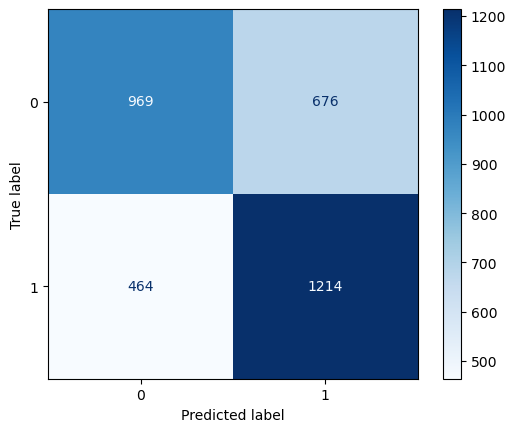

In [58]:
# Melihat confusion matrix dengan ConfusionMatrixDisplay()
vis_cm = ConfusionMatrixDisplay(confusion_matrix = cm_logreg,
                                display_labels = pipe_logreg.classes_)
vis_cm.plot(cmap=plt.cm.Blues) # cm adalah singkatan dari colormap

In [59]:
# Melihat ringkasan evaluasi
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.68      0.59      0.63      1645
           1       0.64      0.72      0.68      1678

    accuracy                           0.66      3323
   macro avg       0.66      0.66      0.66      3323
weighted avg       0.66      0.66      0.66      3323



In [60]:
# Menghitung metrics klasifikasi satu per satu
print('Nilai akurasi: {:.2f}'.format(accuracy_score(y_test, pred_test)))
print('Nilai presisi: {:.2f}'.format(precision_score(y_test, pred_test)))
print('Nilai recall: {:.2f}'.format(recall_score(y_test, pred_test)))
print('Nilai f1: {:.2f}'.format(f1_score(y_test, pred_test)))

Nilai akurasi: 0.66
Nilai presisi: 0.64
Nilai recall: 0.72
Nilai f1: 0.68


Proses pembuatan pipeline berhasil dan tidak memunculkan *error* , sekarang kita akan mendefinisikan beberapa model kemudian diikuti dengan *hyperparameter tuning*.

#### 1. Logistic Regression

In [61]:
# Model regresi logistik
logreg = LogisticRegression(max_iter=1000)

# Pipeline model regresi logistik
pipe_logreg = Pipeline([
    ('preprocessing', preprocessor),
    ('logreg', logreg)
])

# Hyperparameter tuning Logistic Regression
param_logreg = {'logreg__penalty': ['l2'],
                'logreg__C': [0.01, 0.09, 0.1, 0.125, 1, 1.5],
                'logreg__solver' : ['liblinear', 'newton-cg', 'sag', 'saga', 'lbfgs']
               }

<br>

#### 2. Decision Tree

In [62]:
# Model DT
dt = DecisionTreeClassifier(random_state= 0)

# Pipeline model DT
pipe_dt = Pipeline([
    ('preprocessing', preprocessor),
    ('dt', dt)
])

# Hyperparameter tuning DT
param_dt = {'dt__min_samples_split': [2, 3, 4],
            'dt__min_samples_leaf': [1, 2, 3, 4],
            'dt__criterion': ['gini', 'entropy','log_loss'],
            'dt__max_depth':[1,2,3,4]
           }

<br>

#### 3. SVM

In [63]:
# Model SVM
svm = SVC(kernel = 'rbf', random_state = 0)

# Pipeline model SVM
pipe_svm = Pipeline([
    ('preprocessing', preprocessor),
    ('svm', svm)
])

# Hyperparameter tuning SVM
param_svm = {'svm__C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1],
             'svm__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'svm__degree': [1, 2, 3, 4, 5],
             'svm__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
            }

<br>

#### 4. KNN

In [64]:
# Model KNN
knn = KNeighborsClassifier()

# Pipeline model KNN
pipe_knn = Pipeline([
    ('preprocessing', preprocessor),
    ('knn', knn),
])

# Hyperparameter tuning KNN
param_knn = {'knn__n_neighbors': [1, 2, 3, 4, 5],
             'knn__weights': ['uniform', 'distance'],
             'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }

<br>

#### 5. Random Forest 

In [65]:
# Model RF
rf = RandomForestClassifier(random_state=0, n_jobs=-1)

# Pipeline model RF
pipe_rf = Pipeline([
    ('preprocessing', preprocessor),
    ('rf', rf),
])

# Hyperparameter tuning RF
param_rf = {'rf__n_estimators': [200, 250, 300],
            'rf__criterion': ['gini', 'entropy', 'log_loss'],
            'rf__max_depth': [1, 2, 3, 4],
            'rf__min_samples_split': [2, 3],
            'rf__min_samples_leaf': [1, 2, 3],
            'rf__warm_start': [True]
            }

<br>

#### 6. AdaBoost

In [66]:
# Model AdaBoost
ada = AdaBoostClassifier(random_state=0)

# Pipeline model AdaBoost
pipe_ada = Pipeline([
    ('preprocessing', preprocessor),
    ('ada', ada),
])

# Hyperparameter tuning AdaBoost
param_ada = {'ada__n_estimators': [10, 20, 30, 50, 70],
             'ada__learning_rate': [0.3, 0.4, 0.5, 1, 1.1],
             'ada__algorithm': ['SAMME', 'SAMME.R'],
             }

<br>

#### 7. Gradient Boosting

In [67]:
# Model regresi XGBoost
gb = GradientBoostingClassifier(random_state=0)

# Pipeline model regresi XGBoost
pipe_gb = Pipeline([
    ('preprocessing', preprocessor),
    ('gb',gb)
])

# Hyperparameter tuning regresi XGBoost
param_gb = {'gb__loss': ['log_loss', 'deviance', 'exponential'],
            'gb__learning_rate': [0.1, 0.3, 0.4, 0.5, 1, 1.1],
            'gb__n_estimators': [10, 20, 30, 50, 70]}

<br>

#### 8. XGBoost

In [68]:
# Model regresi LightGBM
xgb = XGBClassifier(eval_metric='logloss', random_state=0)

# pipeline model
pipe_xgb = Pipeline([
    ('preprocessing', preprocessor),
    ('xgb', xgb),
])

# hyperparameter tuning
param_xgb = {'xgb__learning_rate': [0.05, 0.1, 0.2],
             'xgb__max_depth': [5, 7, 9],
             'xgb__gamma': [0, 0.1, 0.2]
            }

<br>

## Pipeline dan Cross Validation

Sekarang saatnya melakukan model *training* dengan *cross validation*.

Daftar metrik yang bisa dipakai menggunakan perintah <code>cross_val_score()</code>:<br>
https://scikit-learn.org/stable/modules/model_evaluation.html

In [69]:
# Model training dengan cross validation
daftar_model = [pipe_logreg, pipe_dt, pipe_svm, pipe_knn, pipe_rf, pipe_ada, pipe_gb, pipe_xgb]
daftar_nama_model = ['logreg', 'dt', 'svm', 'knn', 'rf', 'ada', 'gb', 'xgb']
mean_akurasi = []
mean_auc = []
std_akurasi = []
std_auc = []
test_score_akurasi = []
test_score_auc = []

# Kita setting agar proses cross validasi dilakukan dengan sama rata (stratified) untuk pembagian kategori labelnya
skf = StratifiedKFold(n_splits=3, random_state=0, shuffle=True)
cv = skf

# Looping untuk setiap model yang sudah disiapkan 
for i in daftar_model:
    
    # Melakukan cross validation dan menggunakan kriteria berdasarkan skor akurasi
    cv_akurasi = cross_val_score(i, X_train, y_train, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)  # kita kalikan dengan -1 karena scoring menggunakan nilai negatif
    cv_auc = cross_val_score(i, X_train, y_train, cv=cv, scoring='roc_auc', verbose=1, n_jobs=-1)
    
    # Menghitung nilai rata-rata akurasi dan menambahkannya ke variabel mean_akurasi
    mean_akurasi.append(round(cv_akurasi.mean(),2))   # round(nilai,2) untuk membulatkan nilai 2 angka di belakang koma
    mean_auc.append(round(cv_auc.mean(),2))

    # Menghitung nilai standar deviasi akurasi dan menambahkannya ke variabel std_akurasi
    std_akurasi.append(round(cv_akurasi.std(),2))
    std_auc.append(round(cv_auc.std(),2))
    
    # Melakukan fitting training set kemudian melakukan prediksi  di test set
    i.fit(X_train, y_train)
    i_predict = i.predict(X_test)
    
    # Menghitung nilai rata-rata akurasi di test set dan menambahkannya ke variabel test_score_akurasi
    test_score_akurasi.append(round(accuracy_score(y_test, i_predict),2))
    test_score_auc.append(round(roc_auc_score(y_test, i_predict),2))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.7s finished
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished
D:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  war

In [70]:
# Membuat DataFrame
cv_akurasi = pd.DataFrame({'model':daftar_nama_model, 'Train_Mean':mean_akurasi, 'std':std_akurasi, 'Test_Score':test_score_akurasi})
cv_auc = pd.DataFrame({'model':daftar_nama_model, 'Train_Mean':mean_auc, 'std':std_auc, 'Test_Score':test_score_auc})

In [71]:
# Melihat hasil cross validation berdasarkan akurasi
cv_akurasi

,model,Train_Mean,std,Test_Score
0,logreg,0.65,0.01,0.66
1,dt,0.80,0.00,0.82
2,svm,0.68,0.01,0.68
3,knn,0.73,0.01,0.75
4,rf,0.86,0.00,0.87
5,ada,0.82,0.00,0.81
6,gb,0.84,0.01,0.83
7,xgb,0.89,0.00,0.91


In [72]:
# Melihat hasil cross validation berdasarkan akurasi
cv_auc

,model,Train_Mean,std,Test_Score
0,logreg,0.66,0.01,0.66
1,dt,0.80,0.00,0.82
2,svm,0.73,0.01,0.68
3,knn,0.80,0.01,0.75
4,rf,0.91,0.01,0.87
5,ada,0.88,0.00,0.81
6,gb,0.91,0.01,0.83
7,xgb,0.96,0.00,0.91


In [73]:
# Mengurutkan skor dari kecil ke besar berdasarkan skor akurasi
cv_akurasi_urut = cv_akurasi.sort_values(by=['Train_Mean', 'Test_Score'], ascending=False,  ignore_index=True)
cv_akurasi_urut

,model,Train_Mean,std,Test_Score
0,xgb,0.89,0.00,0.91
1,rf,0.86,0.00,0.87
2,gb,0.84,0.01,0.83
3,ada,0.82,0.00,0.81
4,dt,0.80,0.00,0.82
5,knn,0.73,0.01,0.75
6,svm,0.68,0.01,0.68
7,logreg,0.65,0.01,0.66


In [74]:
# Mengurutkan skor dari kecil ke besar berdasarkan skor AUC
cv_auc_urut = cv_auc.sort_values(by=['Train_Mean', 'Test_Score'], ascending=False,  ignore_index=True)
cv_auc_urut

,model,Train_Mean,std,Test_Score
0,xgb,0.96,0.00,0.91
1,rf,0.91,0.01,0.87
2,gb,0.91,0.01,0.83
3,ada,0.88,0.00,0.81
4,dt,0.80,0.00,0.82
5,knn,0.80,0.01,0.75
6,svm,0.73,0.01,0.68
7,logreg,0.66,0.01,0.66


<br>

## Hyperparameter Tuning

Kita sudah melihat bahwa model rf yang terbaik dibanding semua model, berdasarkan skor akurasi yang tinggi dan skor auc yang tinggi pula.

Namun semua model yang dibandingkan menggunakan *hyperparameter* default. 

Kita akan coba membandingkan kembali semua model tersebut dengan *setting*an *hyperparameter* yang sudah kita *tuning* dengan menggunakan `RandomizedSearchCV` atau <code>GridSearchCV()</code>.

`RandomizedSearchCV` akan memilih secara random semua settingan *hyperparameter* yang sudah disiapkan. Proses ini lebih cepat dari <code>GridSearchCV()</code>, namun tidak memastikan akan mendapatkan settingan terbaik.

<code>GridSearchCV()</code> akan mengevaluasi semua settingan dari *hyperparameter* yang sudah disiapkan dan mempertahankan *setting*-an terbaik sampai selesai (setelah mencoba semua kombinasi *hyperparameter* dan semua *fold* di *cross validation*).

In [80]:
# Model training dengan RandomSearchCV
daftar_model = [pipe_logreg, pipe_dt, pipe_svm, pipe_knn, pipe_rf, pipe_ada, pipe_gb, pipe_xgb]
daftar_nama_model = ['logreg', 'dt', 'svm', 'knn', 'rf', 'ada', 'gb', 'xgb']
daftar_param_model = [param_logreg, param_dt, param_svm, param_knn, 
                      param_rf, param_ada, param_gb, param_xgb]

# Nilai yang akan diisikan
akurasi_tuning = []
akurasi_tuning_test = []
auc_tuning = []
auc_tuning_test = []
best_param = []
best_estimator = []

for i in range(len(daftar_model)):
    
    # Menjalankan RandomizedSearchCV
    model_random_cv = RandomizedSearchCV(
        daftar_model[i],
        daftar_param_model[i],
        cv=5,
        scoring='accuracy',  # nilai akurasi digunakan sebagai dasar penentuan peringkat parameter terbaik dan parameter scoring ini bisa diganti yang lain
        verbose=1,
        n_jobs=-1
        )
    
    # Fitting ke training set
    model_random_cv.fit(X_train,y_train)
    
    # Mencoba memprediksi training dan test set setelah fitting di training set, kemudian dikemas dalam format DataFrame
    pred_train = pd.DataFrame(model_random_cv.predict(X_train), columns=['Loan Status'])
    pred_test = pd.DataFrame(model_random_cv.predict(X_test), columns=['Loan Status'])

    # Mencatat skor MAE training dan test set
    akurasi_tuning.append(accuracy_score(y_train, pred_train))
    akurasi_tuning_test.append(accuracy_score(y_test, pred_test))

    # Mencatat skor R2 training dan test set
    auc_tuning.append(roc_auc_score(y_train, pred_train))
    auc_tuning_test.append(roc_auc_score(y_test, pred_test))   
    
    # Mencatat parameter terbaik di setiap model
    best_param.append(model_random_cv.best_params_)
    
    # Merekam settingan modelnya
    best_estimator.append(model_random_cv.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


D:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits


D:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits


D:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits


D:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits


D:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits


D:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits


D:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Fitting 5 folds for each of 10 candidates, totalling 50 fits


D:\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
# Model training dengan GridSearchCV
daftar_model = [pipe_logreg, pipe_dt, pipe_svm, pipe_knn, pipe_rf, pipe_ada, pipe_gb, pipe_xgb]
daftar_nama_model = ['logreg', 'dt', 'svm', 'knn', 'rf', 'ada', 'gb', 'xgb']
daftar_param_model = [param_logreg, param_dt, param_svm, param_knn, 
                      param_rf, param_ada, param_gb, param_xgb]

# Nilai yang akan diisikan
akurasi_tuning = []
akurasi_tuning_test = []
auc_tuning = []
auc_tuning_test = []
best_param = []
best_estimator = []

for i in range(len(daftar_model)):
    
    # Menjalankan GridSearchCV
    model_grid_cv = GridSearchCV(
        daftar_model[i],
        daftar_param_model[i],
        cv=3,
        scoring='accuracy',  # nilai akurasi digunakan sebagai dasar penentuan peringkat parameter terbaik dan parameter scoring ini bisa diganti yang lain
        verbose=1,
        n_jobs=-1
        )
    
    # Fitting ke training set
    model_grid_cv.fit(X_train,y_train)
    
    # Mencoba memprediksi training dan test set setelah fitting di training set, kemudian dikemas dalam format DataFrame
    pred_train = pd.DataFrame(model_grid_cv.predict(X_train), columns=['Loan Status'])
    pred_test = pd.DataFrame(model_grid_cv.predict(X_test), columns=['Loan Status'])

    # Mencatat skor MAE training dan test set
    akurasi_tuning.append(accuracy_score(y_train, pred_train))
    akurasi_tuning_test.append(accuracy_score(y_test, pred_test))

    # Mencatat skor R2 training dan test set
    auc_tuning.append(roc_auc_score(y_train, pred_train))
    auc_tuning_test.append(roc_auc_score(y_test, pred_test))   
    
    # Mencatat parameter terbaik di setiap model
    best_param.append(model_grid_cv.best_params_)
    
    # Merekam settingan modelnya
    best_estimator.append(model_grid_cv.best_estimator_)

In [81]:
# Membuat DataFrame sekaligus kita urutkan
grid_akurasi = pd.DataFrame({'model':daftar_nama_model, 'Training':akurasi_tuning, 'Testing':akurasi_tuning_test})
grid_akurasi_urut = grid_akurasi.sort_values(by='Testing', ascending=False,  ignore_index=True)

grid_auc = pd.DataFrame({'model':daftar_nama_model, 'Training':auc_tuning, 'Testing':auc_tuning_test})
grid_auc_urut = grid_auc.sort_values(by='Testing', ascending=False, ignore_index=True)

Kita pilih model terbaik berdasarkan performanya di *Test Set*.

In [82]:
# Melihat performa tuning berdasarkan MAE
grid_akurasi_urut

,model,Training,Testing
0,xgb,0.991045,0.908817
1,gb,0.912334,0.872705
2,ada,0.832418,0.807403
3,dt,0.805704,0.795065
4,knn,1.000000,0.785435
5,rf,0.772067,0.760156
6,svm,0.728196,0.692146
7,logreg,0.661224,0.658441


Perlu diperhatikan bahwa skor akurasi di kolom *Training* di atas adalah skor akurasi rata-rata dari *cross validation*. Begitu juga untuk nilai akurasi di kolom *Testing*.

In [83]:
# Melihat performa tuning berdasarkan R2
grid_auc_urut

,model,Training,Testing
0,xgb,0.991042,0.908835
1,gb,0.912327,0.872582
2,ada,0.832572,0.806655
3,dt,0.805896,0.794139
4,knn,1.000000,0.785351
5,rf,0.772457,0.758498
6,svm,0.728590,0.690594
7,logreg,0.661393,0.657771


Dari model di atas dapat kita lihat bahwa model terbaik adalah menggunakan AdaBoost.

Sekarang kita bisa menyimpam parameter dan estimator dari setiap model dalam format DataFrame.

In [84]:
# Parameter terbaik dari model terbaik
grid_param = pd.DataFrame({'model':daftar_nama_model, 'Param':best_param})
grid_param

,model,Param
0,logreg,"{'logreg__solver': 'saga', 'logreg__penalty': ..."
1,dt,"{'dt__min_samples_split': 3, 'dt__min_samples_..."
2,svm,"{'svm__kernel': 'rbf', 'svm__gamma': 1, 'svm__..."
3,knn,"{'knn__weights': 'distance', 'knn__n_neighbors..."
4,rf,"{'rf__warm_start': True, 'rf__n_estimators': 2..."
5,ada,"{'ada__n_estimators': 70, 'ada__learning_rate'..."
6,gb,"{'gb__n_estimators': 70, 'gb__loss': 'exponent..."
7,xgb,"{'xgb__max_depth': 9, 'xgb__learning_rate': 0...."


In [85]:
# Estimator terbaik dari model terbaik
grid_estimator = pd.DataFrame({'model':daftar_nama_model, 'Param':best_estimator})
grid_estimator

,model,Param
0,logreg,(ColumnTransformer(transformers=[('preprocessi...
1,dt,(ColumnTransformer(transformers=[('preprocessi...
2,svm,(ColumnTransformer(transformers=[('preprocessi...
3,knn,(ColumnTransformer(transformers=[('preprocessi...
4,rf,(ColumnTransformer(transformers=[('preprocessi...
5,ada,(ColumnTransformer(transformers=[('preprocessi...
6,gb,(ColumnTransformer(transformers=[('preprocessi...
7,xgb,(ColumnTransformer(transformers=[('preprocessi...


In [86]:
# Kita gabungkan semua sebagai 'model_best'
model_best = pd.DataFrame({'model':daftar_nama_model, 'Param':best_estimator, 'Testing':akurasi_tuning_test})
model_best = model_best.sort_values(by='Testing', ascending=False, ignore_index=True)
model_best

,model,Param,Testing
0,xgb,(ColumnTransformer(transformers=[('preprocessi...,0.908817
1,gb,(ColumnTransformer(transformers=[('preprocessi...,0.872705
2,ada,(ColumnTransformer(transformers=[('preprocessi...,0.807403
3,dt,(ColumnTransformer(transformers=[('preprocessi...,0.795065
4,knn,(ColumnTransformer(transformers=[('preprocessi...,0.785435
5,rf,(ColumnTransformer(transformers=[('preprocessi...,0.760156
6,svm,(ColumnTransformer(transformers=[('preprocessi...,0.692146
7,logreg,(ColumnTransformer(transformers=[('preprocessi...,0.658441


<br>

#### Menggunakan Model Terbaik

Sekarang kita bisa menggunakan modelnya dari <code>model_best</code>, di mana jika kita ingin memilih model terbaik maka pilih urutan pertama.

Sehingga jika kita ingin menggunakan *Random Forest*, maka pilih <code>model_best['Param'][0]</code>.

Sekarang kita harus melakukan *fitting* akhir di mana kita akan mentraining parameter dari model terbaik terhadap dataset utuh (gabungan *training set* dan *test set*).

In [87]:
# Fitting ke dataset utuh
model_final = model_best['Param'][0].fit(X_res, y_res)

Sekarang kita memiliki model akhir (`model_final`) yang sudah di*fitting* ke dataset utuh. 

Kita coba gunakan model akhir ini untuk memprediksi X_train dan X_test.

In [88]:
# Melihat spesifikasi model_final
model_final

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('preprocessing numerik',
                                                  Pipeline(steps=[('imputasi',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['Requested_Amount',
                                                   'Emi_Amount', 'Age',
                                                   'Loan_Term',
                                                   'Ex_Showroom_Price',
                                                   'Current Valuation',
                                                   'No_Of_Years_At_Residence',
                                                   'No_Of_Years_In_City',
                                                   'Cost_Of_Vehicle',
                                                   'cibil_score'...
                               feature_types=None, gamma=0.2, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=9, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=0, ...))])

In [44]:
# Load data loan_test.csv
df_test = X_test
df_test.head()

,Requested_Amount,Emi_Amount,Age,Loan_Term,Gender_Desc,Marital_Status_Desc,Resid_Owned_By_Desc,Employment_Type_Desc,Ex_Showroom_Price,Segment,Current Valuation,No_Of_Years_At_Residence,No_Of_Years_In_City,Segment_Desc,Cost_Of_Vehicle,cibil_score,IRR
0,2300000,87892.0,43.67,36.0,Male,Married,SELF,SELF EMPLOYED NON-PROFESSIONAL,3463818.0,A6,3463818.0,42.0,42.0,Premium-II,3463818.0,811.0,17.46
1,400000,9022.0,35.67,60.0,Male,Married,RENTED,SALARIED,363691.0,A3,363691.0,2.0,2.0,Mid-Size,363691.0,693.0,24.20
2,2094000,75000.0,53.75,36.0,Male,Married,SELF,SELF EMPLOYED NON-PROFESSIONAL,2094325.0,SUV,2094325.0,10.0,10.0,SUV,2094325.0,716.0,16.70
3,891000,22626.0,47.70,60.0,Male,NaN,SELF,SELF EMPLOYED NON-PROFESSIONAL,NaN,A3,NaN,10.0,20.0,Mid-Size,990066.0,605.0,17.10
4,800000,NaN,30.17,60.0,Male,Single,NaN,SELF EMPLOYED NON-PROFESSIONAL,NaN,NaN,NaN,NaN,NaN,NaN,886000.0,789.0,25.00


In [93]:
# Memprediksi df_test
hasil = model_final.predict(df_test)
hasil

array([1, 0, 0, ..., 0, 1, 1])

In [99]:
# Keputusan
for i in range(len(hasil)):
    if hasil[i] == 1:
        print('Data pelanggan ke-', i, '= Disbursed')
    else:
        print('Data pelanggan ke-', i, '= Not disbursed')

Data pelanggan ke- 0 = Disbursed
Data pelanggan ke- 1 = Not disbursed
Data pelanggan ke- 2 = Not disbursed
Data pelanggan ke- 3 = Not disbursed
Data pelanggan ke- 4 = Not disbursed
Data pelanggan ke- 5 = Not disbursed
Data pelanggan ke- 6 = Not disbursed
Data pelanggan ke- 7 = Not disbursed
Data pelanggan ke- 8 = Not disbursed
Data pelanggan ke- 9 = Disbursed
Data pelanggan ke- 10 = Not disbursed
Data pelanggan ke- 11 = Disbursed
Data pelanggan ke- 12 = Not disbursed
Data pelanggan ke- 13 = Disbursed
Data pelanggan ke- 14 = Disbursed
Data pelanggan ke- 15 = Not disbursed
Data pelanggan ke- 16 = Not disbursed
Data pelanggan ke- 17 = Not disbursed
Data pelanggan ke- 18 = Disbursed
Data pelanggan ke- 19 = Disbursed
Data pelanggan ke- 20 = Disbursed
Data pelanggan ke- 21 = Not disbursed
Data pelanggan ke- 22 = Not disbursed
Data pelanggan ke- 23 = Not disbursed
Data pelanggan ke- 24 = Disbursed
Data pelanggan ke- 25 = Not disbursed
Data pelanggan ke- 26 = Not disbursed
Data pelanggan ke- 2

<br>

#### Menyimpan Model

Sekarang kita akan menyimpan modelnya untuk nanti bisa dipakai dan di*deploy*.

In [2]:
# Library untuk menyimpan model
import pickle

In [3]:
# Menyimpan model dengan nama 'model_regresi_terbaik.pkl'
pickle.dump(model_final, open('model_klasifikasi_car_loan.pkl', 'wb'))

NameError: name 'model_final' is not defined

Sekarang kita akan coba memprediksi X_test menggunakan model yang sudah kita simpan.

In [4]:
# Load lagi model yang sudah disimpan dan buka sebagai 'best_model'
best_model = pickle.load(open('model_klasifikasi_car_loan.pkl', 'rb'))

In [100]:
# Mencoba melakukan prediksi X_test
prediksi = best_model.predict(df_test)

# Melihat hasil prediksi
prediksi

array([1, 0, 0, ..., 0, 1, 1])

In [59]:
# Mencoba melakukan prediksi X_test dan melihat probabilitasnya di setiap class
prediksi = best_model.predict_proba(df_test)
prediksi2 = best_model.predict_proba(df_test)[:,0]
prediksi3 = best_model.predict_proba(df_test)[:,1]

# Melihat hasil prediksi
print(prediksi)
print('')
print(prediksi2)
print('')
print(prediksi3)

[[0.02813679 0.9718632 ]
 [0.9896848  0.01031516]
 [0.8809997  0.11900034]
 ...
 [0.9193201  0.08067992]
 [0.01237279 0.9876272 ]
 [0.00967002 0.99033   ]]

[0.02813679 0.9896848  0.8809997  ... 0.9193201  0.01237279 0.00967002]

[0.9718632  0.01031516 0.11900034 ... 0.08067992 0.9876272  0.99033   ]


In [61]:
# Merubah dalam format DataFrame
prediksi = pd.DataFrame(prediksi, columns=['0', '1'])
prediksi.head()

,0,1
0,0.028137,0.971863
1,0.989685,0.010315
2,0.881000,0.119000
3,0.971688,0.028312
4,0.997177,0.002823
